In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/home/hamza/Downloads/DataSets/Mall_Customers.csv')

print(df.info())
print('-------------------------------------------------------------------------------')
print(df.describe())
print('-------------------------------------------------------------------------------')

df.drop(['CustomerID'], axis = 1, inplace = True)

# divided Age column to Groups, so Age column become categorical.
intervals = [15, 20, 30, 40, 50, 60, 70]
df['Age_Groups'] = pd.cut(x = df['Age'], bins = intervals)

# split categorical data to separate columns.
new_df = pd.get_dummies(df)

# since now the Genre_Female and Genre_Male have correlation equal to 1, so drop one of them.
new_df.drop(['Age'], axis = 1, inplace = True)
print(new_df.shape)
print('-------------------------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------------------
       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000

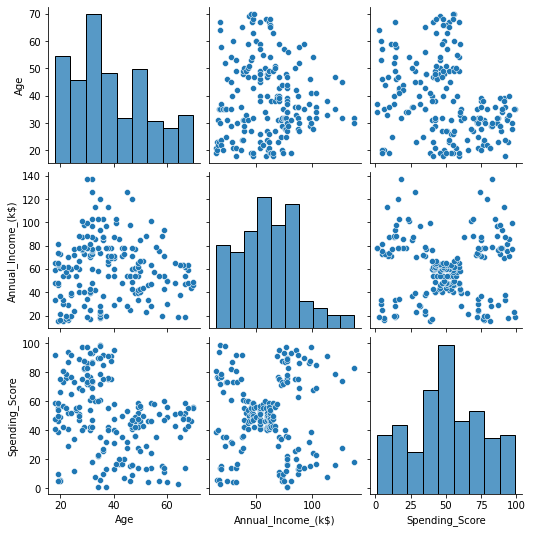

In [2]:
# show pairplot for numeric data.
sns.pairplot(df)
plt.show()

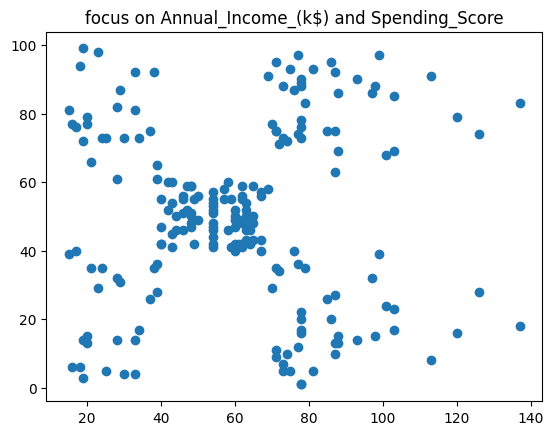

In [3]:
# focuse on correlation between Annual_Income and Spending_Score.
plt.scatter(new_df['Annual_Income_(k$)'], new_df['Spending_Score'])
plt.title('focus on Annual_Income_(k$) and Spending_Score')
plt.show()

[0.509337   0.99909504 0.99946364 0.99965506 0.99977937 0.99986848
 0.99993716 1.         1.         1.        ]
-------------------------------------------------------------------------------


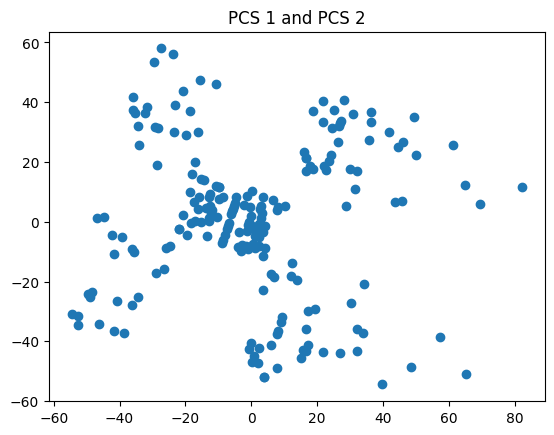

In [4]:
pca = PCA(n_components = 10)
pca.fit_transform(new_df)
print(pca.explained_variance_ratio_.cumsum())
print('-------------------------------------------------------------------------------')

pca = PCA(n_components = 2)
pcs = pca.fit_transform(new_df)

plt.scatter(pcs[:,0], pcs[:,1])
plt.title('PCS 1 and PCS 2')
plt.show()

Compare between PCA and (focus on Annual_Income_(k$) with Spending_Score)


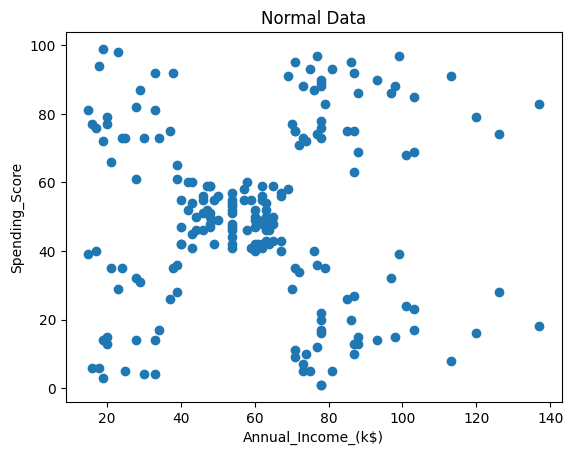

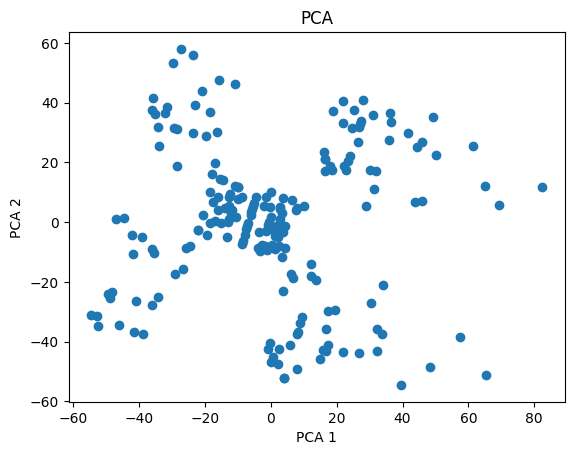

In [5]:
print('Compare between PCA and (focus on Annual_Income_(k$) with Spending_Score)')
('-------------------------------------------------------------------------------')
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'])
plt.title('Normal Data')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

plt.scatter(pcs[:,0], pcs[:,1])
plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

                        # now we want to difine the (eps and min_samles) values.

'''
1) the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension.
2) Epsilon (Eps): To calculate the value of Eps,
    we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours.
    After that, we sort them and finally plot them. From the plot,
    we identify the maximum value at the curvature of the graph(eldow point). This value is our Eps.
'''

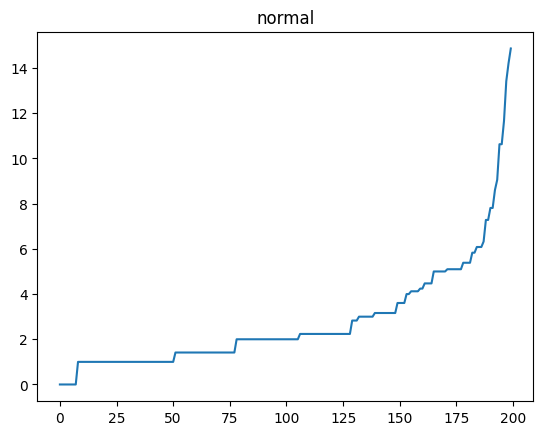

-----------------------------------------------------------------


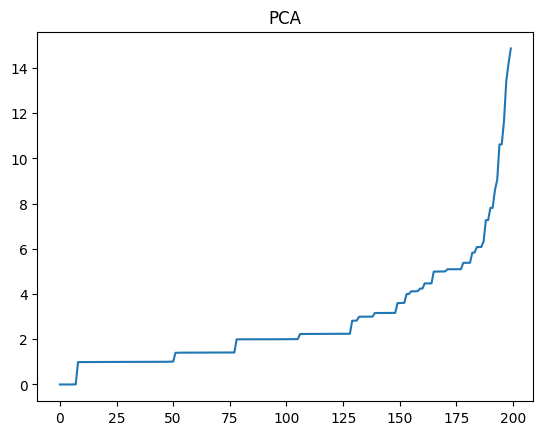

In [6]:
selected_data = new_df[['Annual_Income_(k$)','Spending_Score']]

nn = NearestNeighbors(n_neighbors = 2)
nbrs = nn.fit(selected_data)
distances, indeces = nbrs.kneighbors(selected_data)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.title('normal')
plt.plot(distances)
plt.show()

print('-----------------------------------------------------------------')

nn = NearestNeighbors(n_neighbors = 2)
nbrs = nn.fit(pcs)
distances, indeces = nbrs.kneighbors(pcs)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.title('PCA')
plt.plot(distances)
plt.show()

In [7]:
'''
with this dataset we found:

for normal:
 1) the min_sample = 2 * 2 = 4.
 2) the Epsilon (eps) = nearly 8.
 
for PCA:
 1) the min_sample = 2 * 2 = 4.
 2) the Epsilon (eps) = nearly 8.
'''

'\nwith this dataset we found:\n\nfor normal:\n 1) the min_sample = 2 * 2 = 4.\n 2) the Epsilon (eps) = nearly 8.\n \nfor PCA:\n 1) the min_sample = 2 * 2 = 4.\n 2) the Epsilon (eps) = nearly 8.\n'

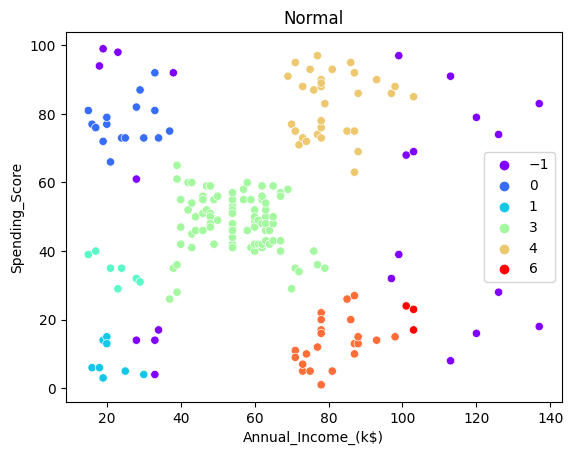

In [16]:
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(selected_data)
labels = dbscan.labels_

sns.scatterplot(new_df['Annual_Income_(k$)'],new_df['Spending_Score'], hue = labels, palette = 'rainbow').set_title('Normal')
plt.show()

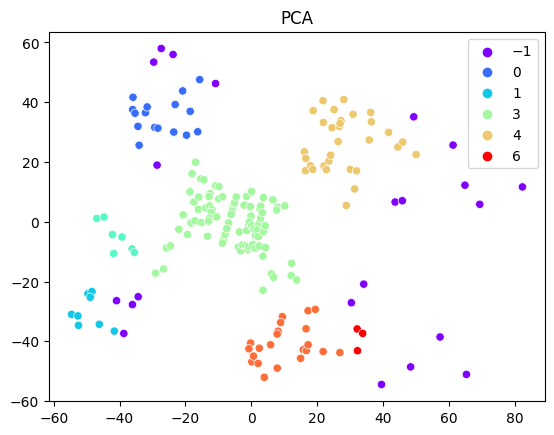

In [11]:
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(pcs)
labels = dbscan.labels_

sns.scatterplot(pcs[:,0], pcs[:,1], hue = labels, palette = 'rainbow').set_title('PCA')
plt.show()